<a href="https://colab.research.google.com/github/Nids700/EDA/blob/main/nidhi_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nidhi Nimmagadda
#22BCE3766
# Module 1
# Load dataset
import pandas as pd
df = pd.read_csv('HepatitisCdata.csv')

print("Data Types:\n", df.dtypes)
print("First few rows:\n", df.head())
print("Dataset dimensions:", df.shape)
print("Summary Statistics:\n", df.describe())


Data Types:
 Serial No      int64
Category      object
Age            int64
Sex           object
ALB          float64
ALP          float64
ALT          float64
AST          float64
BIL          float64
CHE          float64
CHOL         float64
CREA         float64
GGT          float64
PROT         float64
dtype: object
First few rows:
    Serial No       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0          1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1          2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2          3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3          4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4          5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
Dataset dimensions: (615,

In [ ]:
# Module 2
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()
print("Missing values before replacement:\n", df.isnull().sum())
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Missing values after replacement:\n", df.isnull().sum())

Number of duplicate rows: 0
Missing values before replacement:
 Serial No     0
Category      0
Age           0
Sex           0
ALB           1
ALP          18
ALT           1
AST           0
BIL           0
CHE           0
CHOL         10
CREA          0
GGT           0
PROT          1
dtype: int64
Missing values after replacement:
 Serial No    0
Category     0
Age          0
Sex          0
ALB          0
ALP          0
ALT          0
AST          0
BIL          0
CHE          0
CHOL         0
CREA         0
GGT          0
PROT         0
dtype: int64


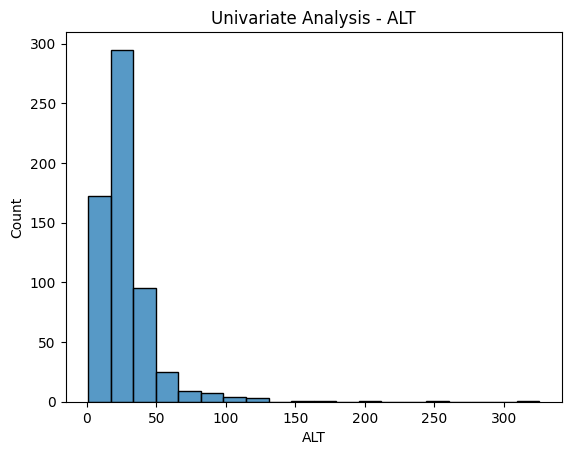

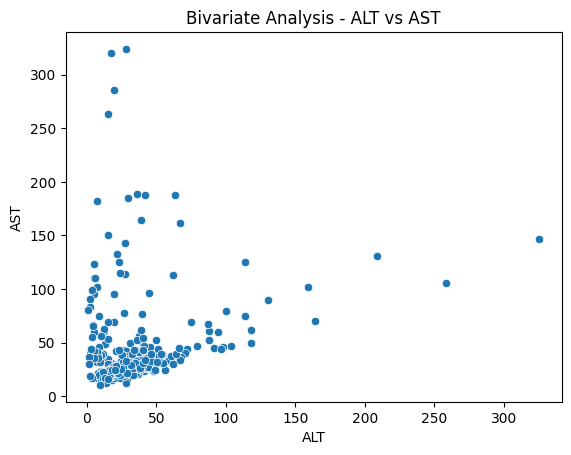

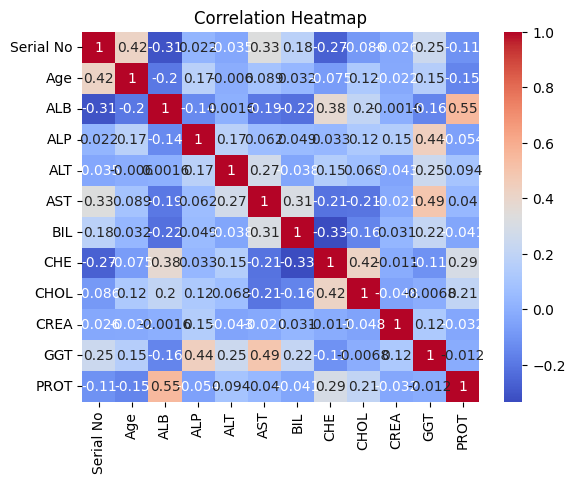

In [ ]:
# Module 3
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Univariate, Bivariate, and Multivariate Analysis
sns.histplot(df['ALT'], bins=20)
plt.title('Univariate Analysis - ALT')
plt.show()

sns.scatterplot(x='ALT', y='AST', data=df)
plt.title('Bivariate Analysis - ALT vs AST')
plt.show()

# Correlation Analysis using only numeric data
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Mean values per column:
 Serial No    308.000000
Category       0.253659
Age           47.408130
ALB           41.620195
ALP           68.283920
ALT           28.450814
AST           34.786341
BIL           11.396748
CHE            8.196634
CHOL           5.368099
CREA          81.287805
GGT           39.533171
PROT          72.044137
dtype: float64
Median values per column:
 Serial No    308.00
Category       0.00
Age           47.00
ALB           41.90
ALP           66.70
ALT           23.00
AST           25.90
BIL            7.30
CHE            8.26
CHOL           5.31
CREA          77.00
GGT           23.30
PROT          72.20
dtype: float64
Standard deviation per column:
 Serial No    177.679487
Category       0.742420
Age           10.055105
ALB            5.775920
ALP           25.643955
ALT           25.448940
AST           33.090690
BIL           19.673150
CHE            2.205657
CHOL           1.123466
CREA          49.756166
GGT           54.661071
PROT           5.398234
dt

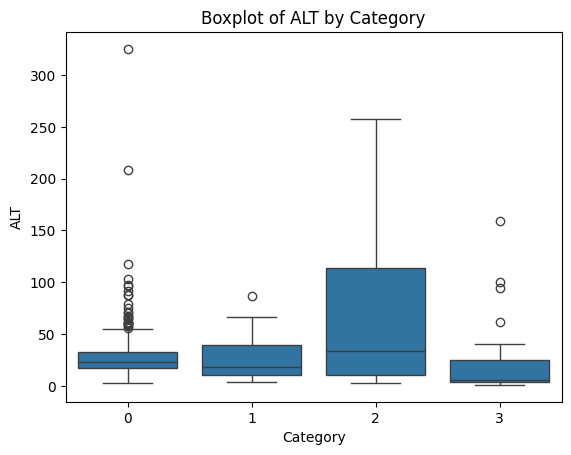

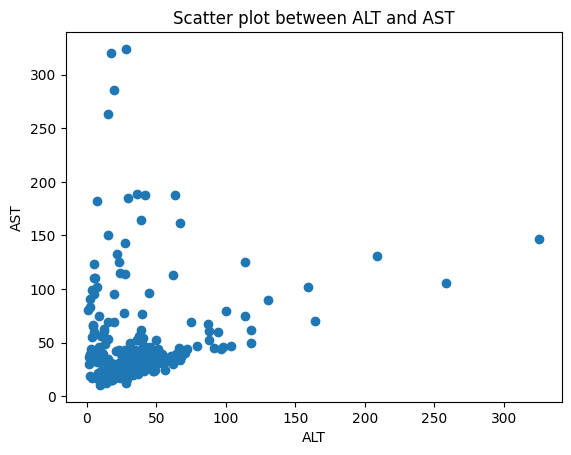

In [ ]:
# Module 4
# Statistical Summary
df['Category'] = pd.to_numeric(df['Category'].str.extract('(\d+)')[0], errors='coerce')

# Calculating mean, median, and standard deviation for numeric columns only
numeric_df = df.select_dtypes(include=['number'])
print("Mean values per column:\n", numeric_df.mean())
print("Median values per column:\n", numeric_df.median())
print("Standard deviation per column:\n", numeric_df.std())

# Visualization (unchanged)
sns.boxplot(x='Category', y='ALT', data=df)
plt.title('Boxplot of ALT by Category')
plt.show()

plt.scatter(df['ALT'], df['AST'])
plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('Scatter plot between ALT and AST')
plt.show()

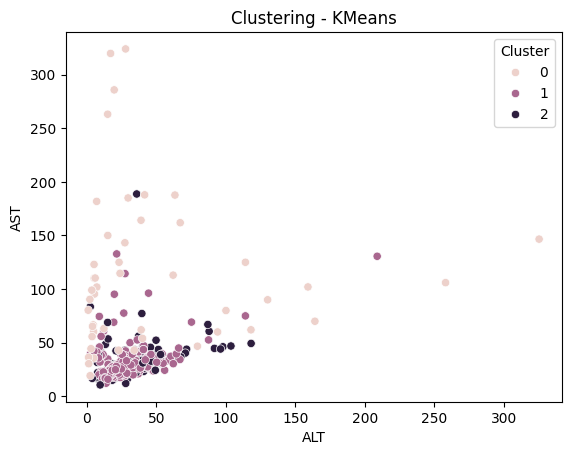

In [ ]:
# Module 5
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# KMeans Clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=df['ALT'], y=df['AST'], hue=df['Cluster'])
plt.title('Clustering - KMeans')
plt.show()

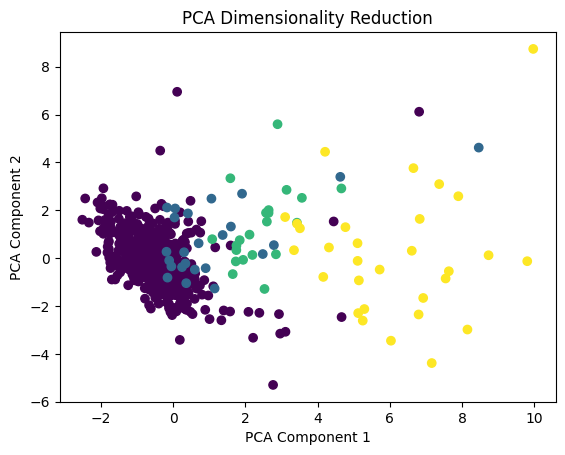

In [ ]:
# Module 6
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Category'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Dimensionality Reduction')
plt.show()

In [ ]:
# Module 7
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting Data for Regression Analysis
X = df[['ALT']]
y = df['AST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared:", r2_score(y_test, y_pred))

Mean Squared Error: 428.909142399314
R-Squared: 0.17794323338596174
